In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

In [12]:
filename = "zillow.csv"
db = "Zillow"
query = '''SELECT bathroomcnt, 
           calculatedfinishedsquarefeet, 
           yearbuilt, 
           taxamount, 
           fips, 
           taxvaluedollarcnt
           FROM properties_2017'''

In [18]:
df = wrangle.get_zillow_data(filename, query, db)
df

,Unnamed: 0,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips,taxvaluedollarcnt
0,0,0.0,0.0,NaN,NaN,NaN,6037.0,27516.0
1,1,0.0,0.0,NaN,NaN,NaN,6037.0,10.0
2,2,0.0,0.0,NaN,NaN,NaN,6037.0,10.0
3,3,0.0,0.0,NaN,NaN,174.21,6037.0,2108.0
4,4,2.0,4.0,3633.0,2005.0,6941.39,6037.0,296425.0
...,...,...,...,...,...,...,...,...
2152858,2152858,3.0,4.0,2262.0,2015.0,13494.52,6059.0,960756.0
2152859,2152859,4.5,4.0,3127.0,2014.0,6244.16,6059.0,536061.0
2152860,2152860,0.0,0.0,NaN,NaN,5783.88,6059.0,208057.0
2152861,2152861,2.5,3.0,1974.0,2015.0,5302.70,6059.0,424353.0


In [21]:
train, validate, test = wrangle.split_zillow_data(df)
train.shape, validate.shape, test.shape

((1205603, 8), (516687, 8), (430573, 8))

In [ ]:
# Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled 
# and scaled distribution .

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [23]:
train.columns

Index(['Unnamed: 0', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'yearbuilt', 'taxamount', 'fips',
       'taxvaluedollarcnt'],
      dtype='object')

In [24]:
to_scale = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxamount']

In [25]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

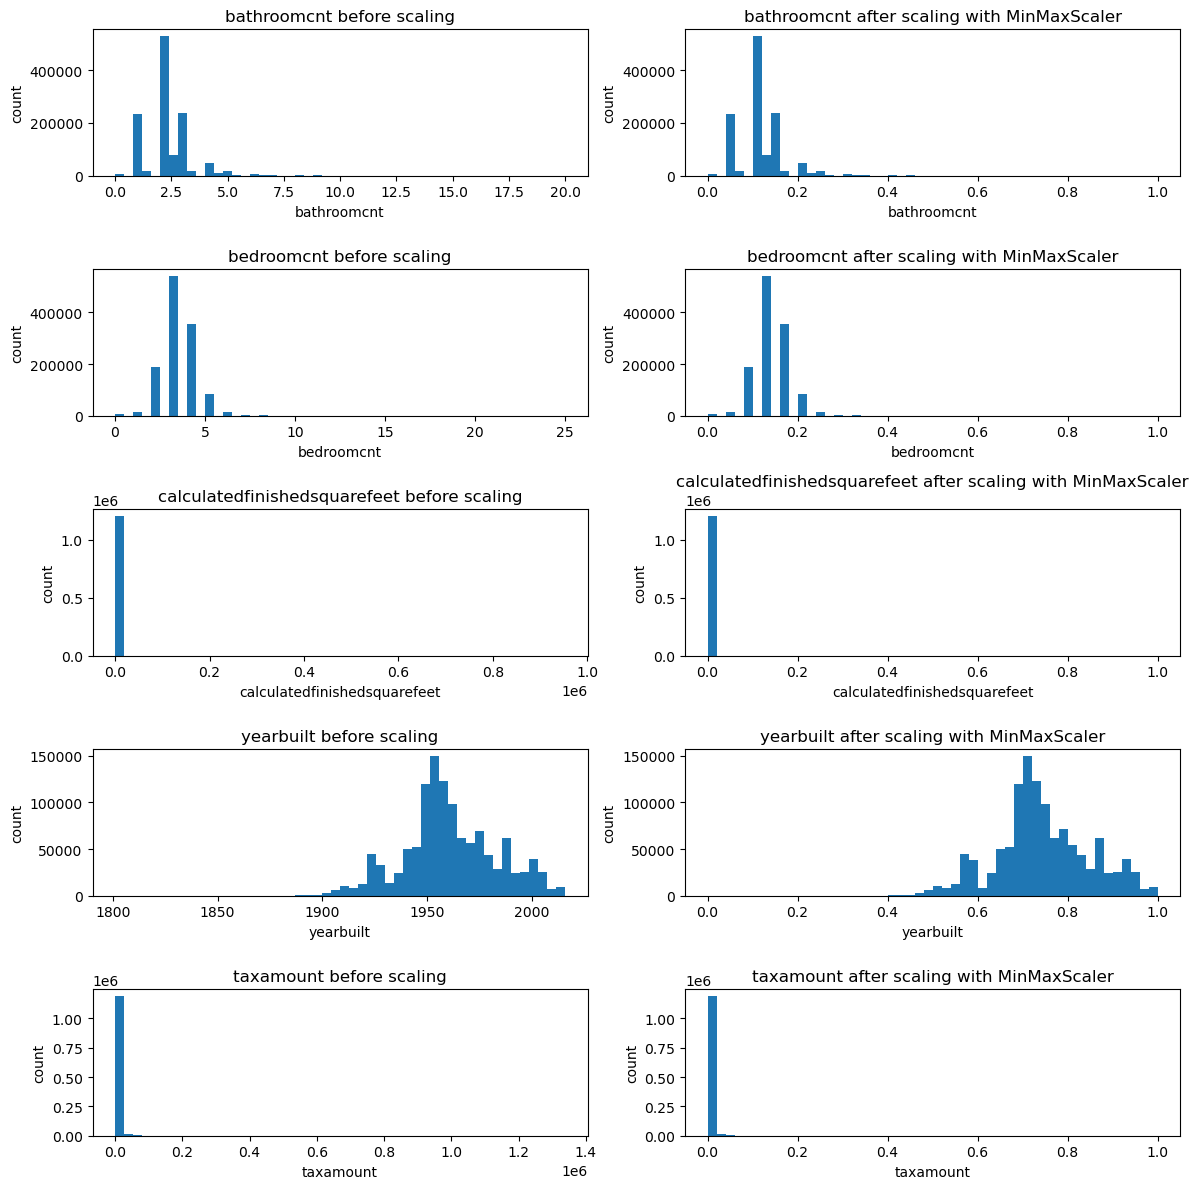

In [26]:
# call function with minmax
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=to_scale,
                 bins=50)

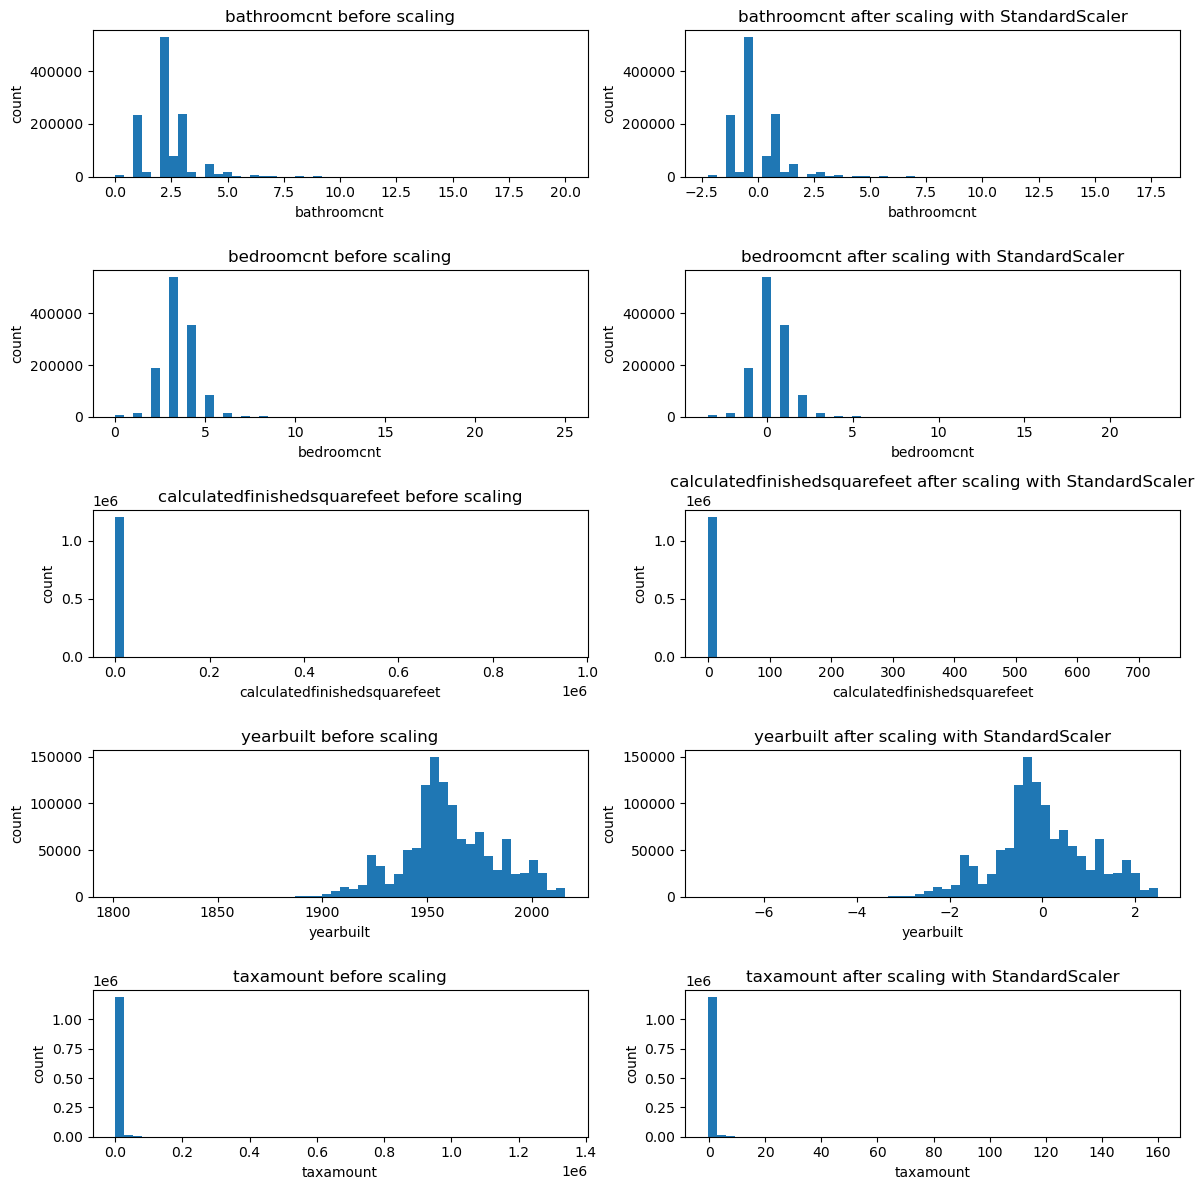

In [28]:
# call function with standard scaler
visualize_scaler(scaler=StandardScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

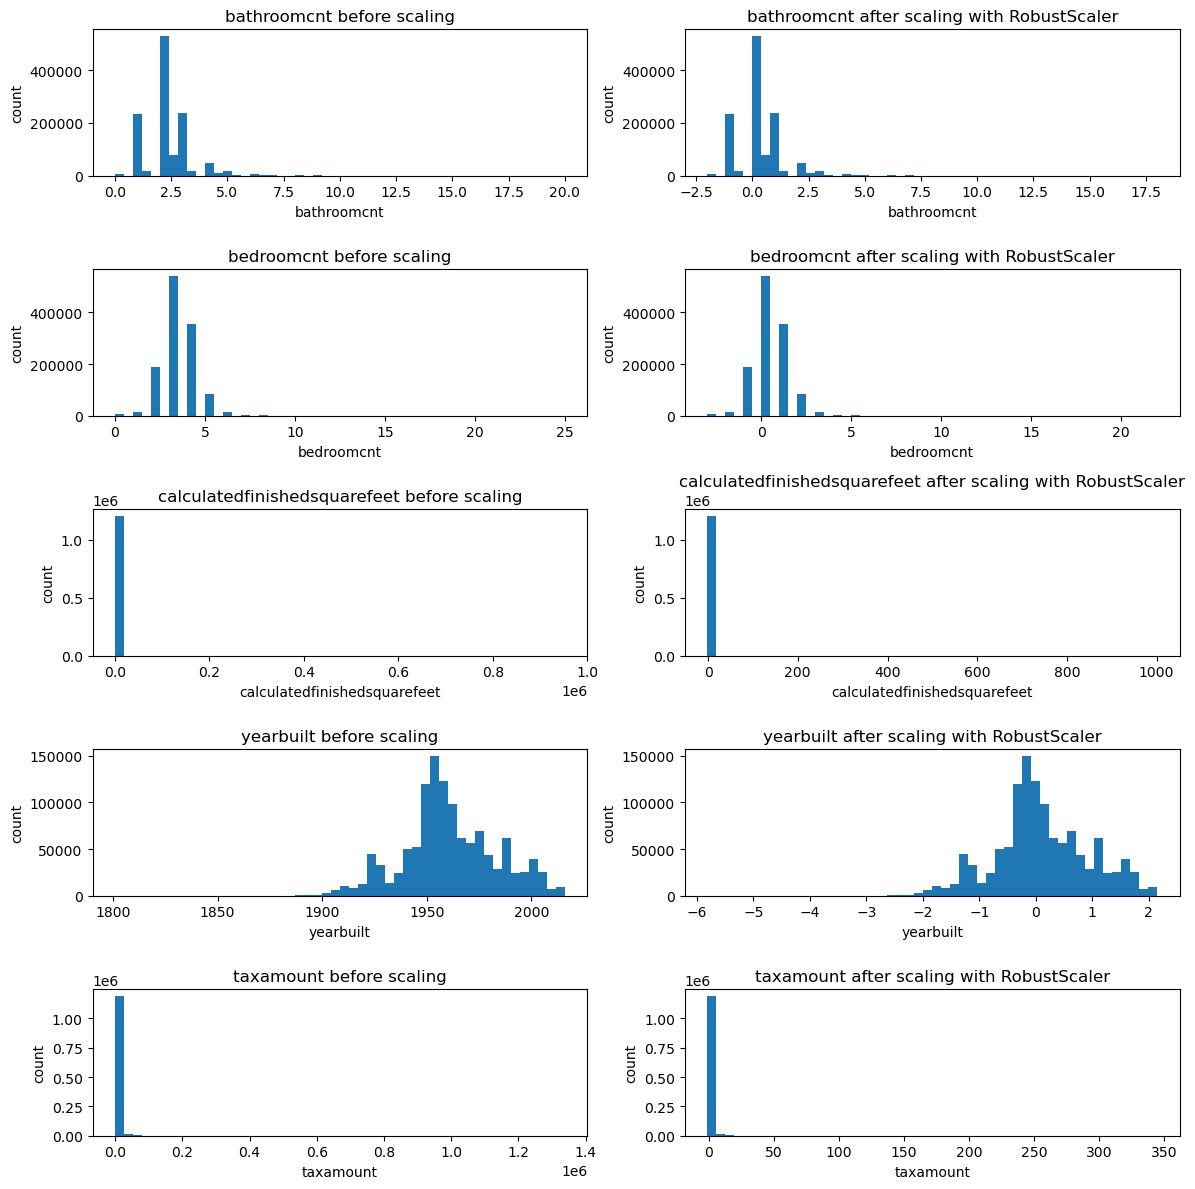

In [29]:
# call function with robustscaler
visualize_scaler(scaler=RobustScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)

In [ ]:
# Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [30]:
#look at original data
train[to_scale].head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount
527907,3.0,4.0,2269.0,1978.0,5224.92
1446880,3.0,4.0,2622.0,1990.0,6551.67
199444,3.0,2.0,1251.0,1985.0,3744.96
1784897,3.0,4.0,1976.0,1978.0,2083.54
66651,2.0,4.0,1654.0,1980.0,5098.99


In [31]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)

In [32]:
#look at scaled data
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount
0,0.15,0.16,0.002381,0.823256,0.003901
1,0.15,0.16,0.002751,0.879070,0.004893
2,0.15,0.08,0.001312,0.855814,0.002795
3,0.15,0.16,0.002073,0.823256,0.001553
4,0.10,0.16,0.001735,0.832558,0.003807


In [33]:
#appling the inverse_transform function to the scaled data
inverse_train_scaled = scaler.inverse_transform(train_scaled)
inverse_train_scaled

array([[3.00000e+00, 4.00000e+00, 2.26900e+03, 1.97800e+03, 5.22492e+03],
       [3.00000e+00, 4.00000e+00, 2.62200e+03, 1.99000e+03, 6.55167e+03],
       [3.00000e+00, 2.00000e+00, 1.25100e+03, 1.98500e+03, 3.74496e+03],
       ...,
       [3.00000e+00, 5.00000e+00, 1.80100e+03, 1.95600e+03, 3.33156e+03],
       [4.00000e+00, 4.00000e+00, 3.74700e+03, 1.97500e+03, 7.98572e+03],
       [2.50000e+00, 4.00000e+00, 1.62700e+03, 1.95900e+03, 4.04686e+03]])

In [34]:
#converting 2d array to df and adding column names
inverted_train = pd.DataFrame(inverse_train_scaled, columns=to_scale)
inverted_train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount
0,3.0,4.0,2269.0,1978.0,5224.92
1,3.0,4.0,2622.0,1990.0,6551.67
2,3.0,2.0,1251.0,1985.0,3744.96
3,3.0,4.0,1976.0,1978.0,2083.54
4,2.0,4.0,1654.0,1980.0,5098.99
...,...,...,...,...,...
1205598,1.0,3.0,980.0,1952.0,4310.48
1205599,3.0,4.0,2458.0,1968.0,4782.60
1205600,3.0,5.0,1801.0,1956.0,3331.56
1205601,4.0,4.0,3747.0,1975.0,7985.72


In [35]:
train.reset_index(drop=True)

,Unnamed: 0,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips,taxvaluedollarcnt
0,527907,3.0,4.0,2269.0,1978.0,5224.92,6111.0,490326.0
1,1446880,3.0,4.0,2622.0,1990.0,6551.67,6037.0,552765.0
2,199444,3.0,2.0,1251.0,1985.0,3744.96,6037.0,316212.0
3,1784897,3.0,4.0,1976.0,1978.0,2083.54,6059.0,166702.0
4,66651,2.0,4.0,1654.0,1980.0,5098.99,6037.0,362552.0
...,...,...,...,...,...,...,...,...
1205598,1642668,1.0,3.0,980.0,1952.0,4310.48,6037.0,360370.0
1205599,2013795,3.0,4.0,2458.0,1968.0,4782.60,6111.0,385891.0
1205600,966451,3.0,5.0,1801.0,1956.0,3331.56,6059.0,257220.0
1205601,2080719,4.0,4.0,3747.0,1975.0,7985.72,6037.0,643559.0


In [36]:
inverted_train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount
0,3.0,4.0,2269.0,1978.0,5224.92
1,3.0,4.0,2622.0,1990.0,6551.67
2,3.0,2.0,1251.0,1985.0,3744.96
3,3.0,4.0,1976.0,1978.0,2083.54
4,2.0,4.0,1654.0,1980.0,5098.99
...,...,...,...,...,...
1205598,1.0,3.0,980.0,1952.0,4310.48
1205599,3.0,4.0,2458.0,1968.0,4782.60
1205600,3.0,5.0,1801.0,1956.0,3331.56
1205601,4.0,4.0,3747.0,1975.0,7985.72


In [ ]:
# We can see that using the inverse_transform function on our scaled data will bring us back to our original data

In [ ]:
# Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. 
# Visualize the result of your data scaling.

In [37]:
from sklearn.preprocessing import QuantileTransformer

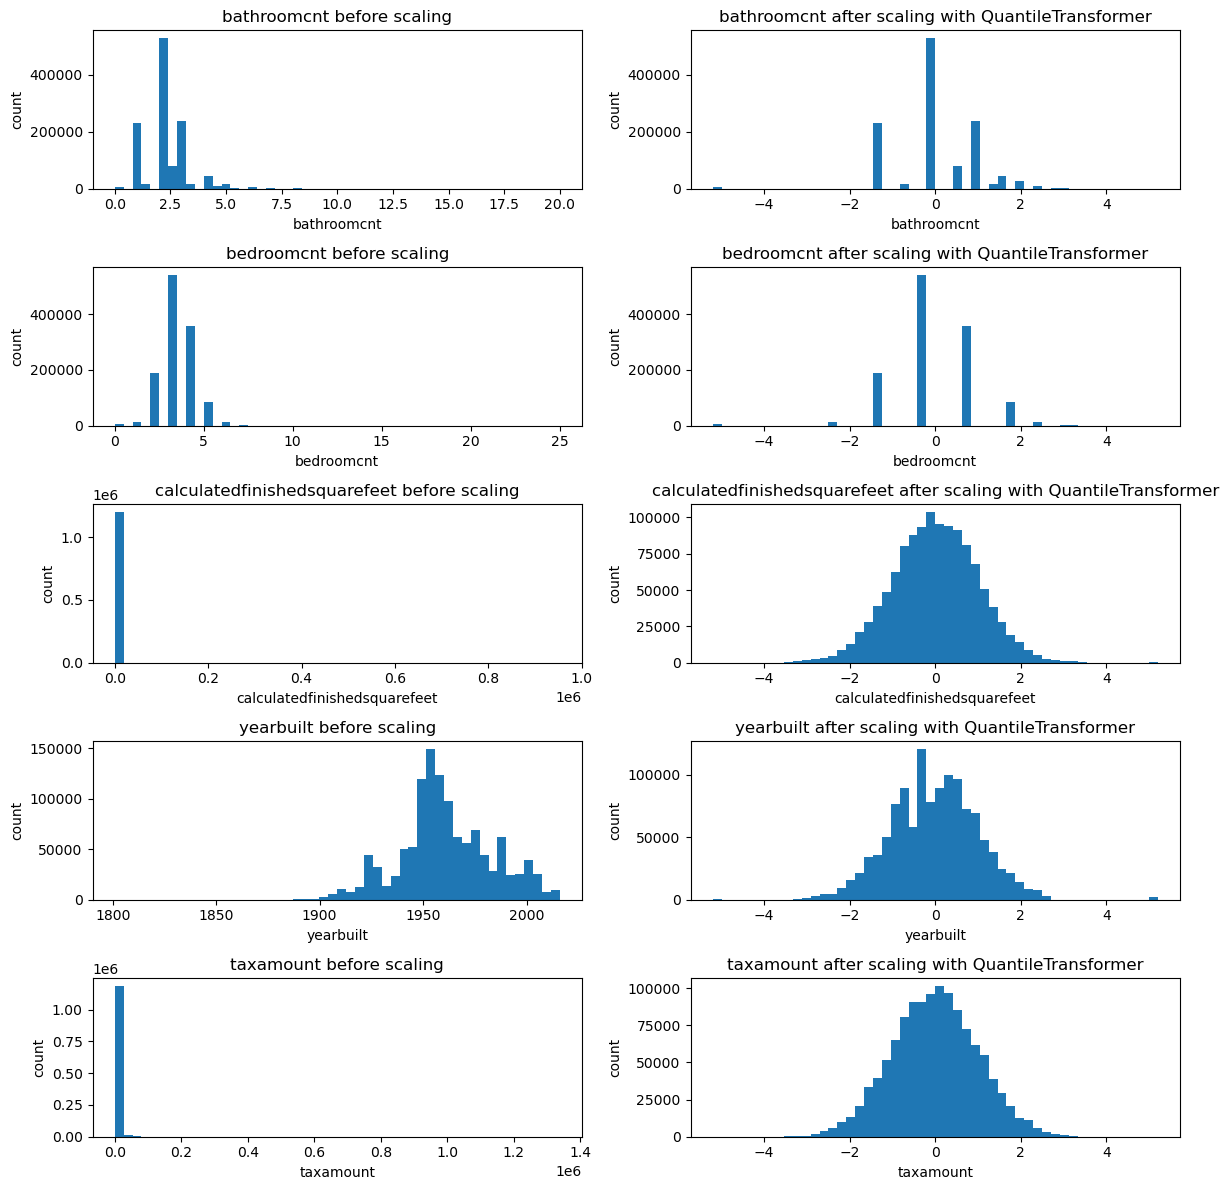

In [38]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=to_scale, 
                 bins=50)

In [ ]:
# Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

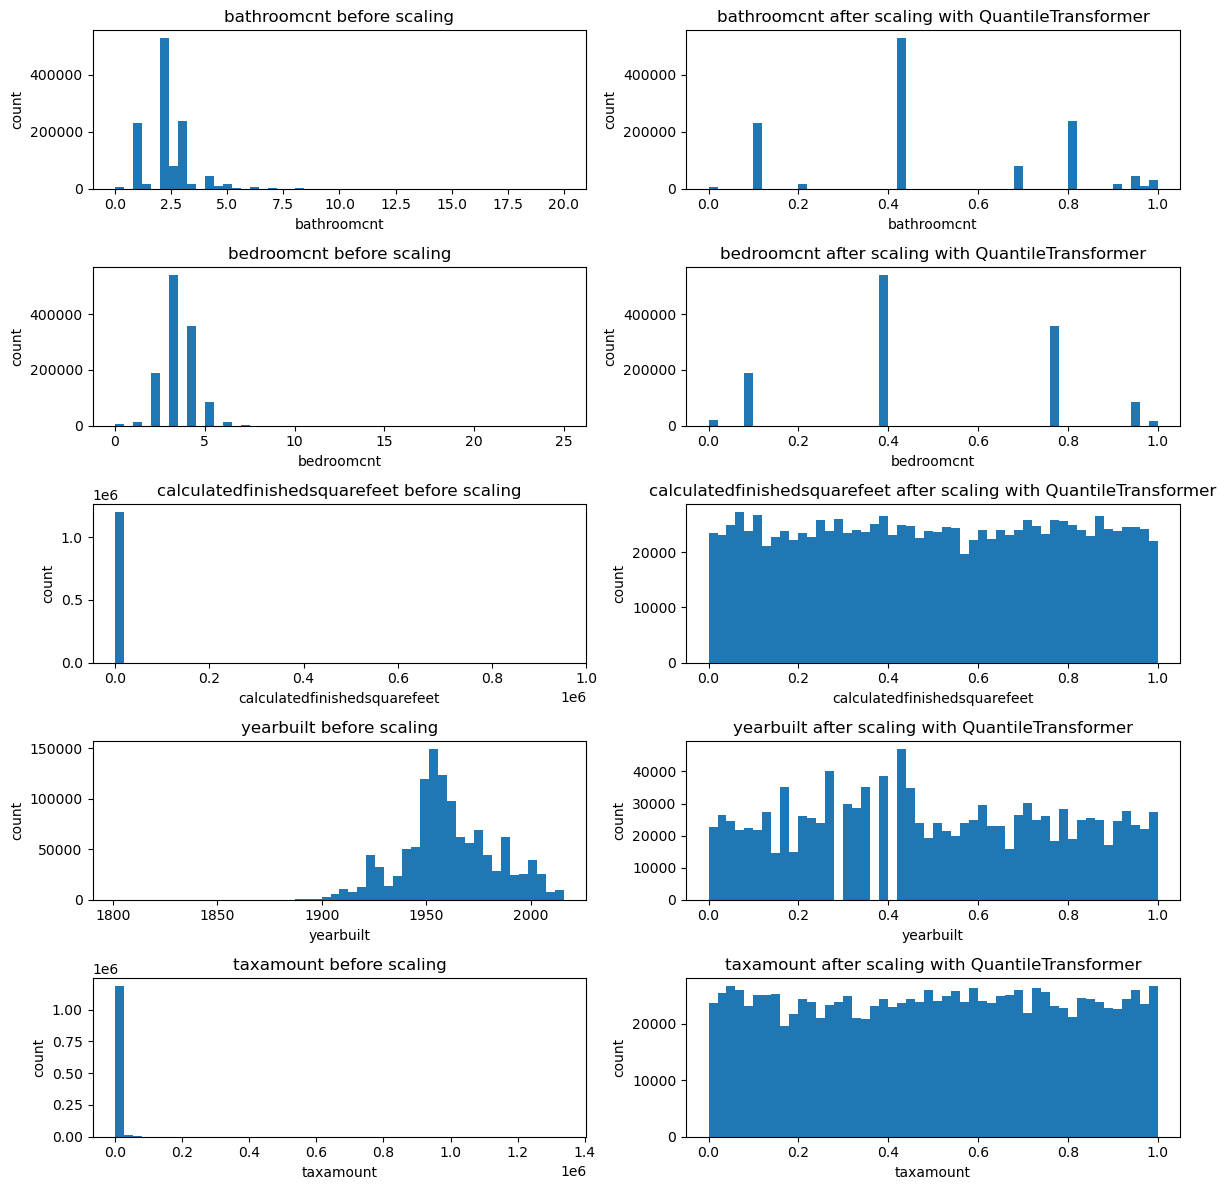

In [39]:
# call function using QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train,
                 columns_to_scale=to_scale, 
                 bins=50)

In [ ]:
# Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, 
# validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [40]:
train.head()

,Unnamed: 0,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips,taxvaluedollarcnt
527907,527907,3.0,4.0,2269.0,1978.0,5224.92,6111.0,490326.0
1446880,1446880,3.0,4.0,2622.0,1990.0,6551.67,6037.0,552765.0
199444,199444,3.0,2.0,1251.0,1985.0,3744.96,6037.0,316212.0
1784897,1784897,3.0,4.0,1976.0,1978.0,2083.54,6059.0,166702.0
66651,66651,2.0,4.0,1654.0,1980.0,5098.99,6037.0,362552.0


In [41]:
to_scale

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'yearbuilt',
 'taxamount']

In [44]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [43]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, to_scale)

ValueError: Length of values (516687) does not match length of index (430573)

In [45]:
train.head()

,Unnamed: 0,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips,taxvaluedollarcnt
527907,527907,3.0,4.0,2269.0,1978.0,5224.92,6111.0,490326.0
1446880,1446880,3.0,4.0,2622.0,1990.0,6551.67,6037.0,552765.0
199444,199444,3.0,2.0,1251.0,1985.0,3744.96,6037.0,316212.0
1784897,1784897,3.0,4.0,1976.0,1978.0,2083.54,6059.0,166702.0
66651,66651,2.0,4.0,1654.0,1980.0,5098.99,6037.0,362552.0


In [46]:
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount
0,0.15,0.16,0.002381,0.823256,0.003901
1,0.15,0.16,0.002751,0.879070,0.004893
2,0.15,0.08,0.001312,0.855814,0.002795
3,0.15,0.16,0.002073,0.823256,0.001553
4,0.10,0.16,0.001735,0.832558,0.003807
